# Grinstead and Snell's Introduction to Probability

## Python setup

In [70]:
import IPython.core.display as ICD
import random
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', None)

%matplotlib inline

## Chapter 1 - Discrete probability distributions

### 1.1 Simulation of discrete probabilities

#### Example 1.1 (Random Number Generation)

The program `RandomNumbers` generates n random real numbers in the interval [0,1], where n is chosen by the user. When we ran the program with n = 20, we obtained the data shown below.

In [2]:
def RandomNumbers(n):
    if (not str(n).isdigit()) | (n < 0):
        raise ValueError('The n argument passed is not valid.')
    return [random.random() for x in range(0, n)]

In [3]:
RandomNumbers(20)

[0.07106036712693575,
 0.883515055709061,
 0.10342666334685602,
 0.022719801637024806,
 0.9878861451676473,
 0.4955343307949305,
 0.07526136827602281,
 0.6596982639773776,
 0.01705315952054509,
 0.13946800013776395,
 0.809561070688687,
 0.777723900993478,
 0.1946466123504219,
 0.39075128684343685,
 0.29702357677052527,
 0.7544411465491708,
 0.09090822547124555,
 0.868843323108251,
 0.21001652378707225,
 0.428343855945584]

#### Example 1.2 (Coin Tossing) 

As we have noted, our intuition suggests that the probability of obtaining a head on a single toss of a coin is 1/2. To have the computer toss a coin, we can ask it to pick a random real number in the interval [0,1] and test to see if this number is less than 1/2. If so, we shall call the outcome heads; if not we call it tails. Another way to proceed would be to ask the computer to pick a random integer from the set {0,1}. The program `CoinTosses` carries out the experiment of tossing a coin n times. Running this program, with n = 20, resulted in:

THTTTHTTTTHTTTTTHHTT

Note that in 20 tosses, we obtained 5 heads and 15 tails. Let us toss a coin n times, where n is much larger than 20, and see if we obtain a proportion of heads closer to our intuitive guess of 1/2. The program `CoinTosses` keeps track of the number of heads. When we ran this program with n = 1000, we obtained 494 heads. When we ran it with n = 10000, we obtained 5039 heads.

We notice that when we tossed the coin 10,000 times, the proportion of heads was close to the “true value” .5 for obtaining a head when a coin is tossed. A mathematical model for this experiment is called Bernoulli Trials (see Chapter 3). The Law of Large Numbers, which we shall study later (see Chapter 8), will show that in the Bernoulli Trials model, the proportion of heads should be near .5, consistent with our intuitive idea of the frequency interpretation of probability. Of course, our program could be easily modiﬁed to simulate coins for which the probability of a head is p, where p is a real number between 0 and 1. 

In [4]:
def CoinTosses(n):
    s_rand = pd.Series(RandomNumbers(n))
    s_out = s_rand.map(lambda x: 'T' if x < 0.5 else 'H')
    return ''.join(s_out.values.tolist())

In [5]:
var_test = CoinTosses(20)
print(var_test)
print('The number of heads:', len(var_test.replace('T', '')))
print('The number of tails:', len(var_test.replace('H', '')))
print('The final proportion, count(H) / count(runs):', len(var_test.replace('H', '')) / len(var_test))
print()
var_test = CoinTosses(100)
print(var_test)
print('The number of heads:', len(var_test.replace('T', '')))
print('The number of tails:', len(var_test.replace('H', '')))
print('The final proportion, count(H) / count(runs):', len(var_test.replace('H', '')) / len(var_test))
print()
var_test = CoinTosses(5000)
print(var_test[0:50], '...', sep='')
print('The number of heads:', len(var_test.replace('T', '')))
print('The number of tails:', len(var_test.replace('H', '')))
print('The final proportion, count(H) / count(runs):', len(var_test.replace('H', '')) / len(var_test))

TTTTHTTTHTTTTHTTHTTH
The number of heads: 5
The number of tails: 15
The final proportion, count(H) / count(runs): 0.75

TTTHHTHTHHTHTTHHHTHHTHTHTTTTTTTHTHTHHTTTTHTTHTHTHTHHHHTHTTHTTTHHTHTTTTHTHHTHTHTHHHHHHTTTTTHHHTTTHHHH
The number of heads: 48
The number of tails: 52
The final proportion, count(H) / count(runs): 0.52

HTHHHHHTHHHTHHTHHTHHHTHHHHTHTHTHHTHHHHHHHHHTHTTHTH...
The number of heads: 2539
The number of tails: 2461
The final proportion, count(H) / count(runs): 0.4922


#### Example 1.3 (Dice Rolling)

We consider a dice game that played an important role in the historical development of probability. The famous letters between Pascal and Fermat, which many believe started a serious study of probability, were instigated by a request for help from a French nobleman and gambler, Chevalier de M´ er´ e. It is said that de M´ er´ e had been betting that, in four rolls of a die, at least one six would turn up. He was winning consistently and, to get more people to play, he changed the game to bet that, in 24 rolls of two dice, a pair of sixes would turn up. It is claimed that de M´ er´ e lost with 24 and felt that 25 rolls were necessary to make the game favorable. It was un grand scandale that mathematics was wrong. 

We shall try to see if de M´ er´ e is correct by simulating his various bets. The program `DeMere1` simulates a large number of experiments, seeing, in each one, if a six turns up in four rolls of a die. When we ran this program for 1000 plays, a six came up in the ﬁrst four rolls 48.6 percent of the time. When we ran it for 10,000 plays this happened 51.98 percent of the time. We note that the result of the second run suggests that de M´ er´ e was correct in believing that his bet with one die was favorable; however, if we had based our conclusion on the ﬁrst run, we would have decided that he was wrong. Accurate results by simulation require a large number of experiments. 

In [6]:
def DeMere1(n, roll_count):
    list_rand = [[random.choice([1, 2, 3, 4, 5, 6]) for y in range(0, roll_count)] for x in range(0, n)]
    s_rand = pd.Series(list_rand)
    s_outcome = s_rand.map(lambda x: 6 in x)
    df_out = pd.concat([s_rand, s_outcome], axis=1)
    return df_out

In [7]:
df_test = DeMere1(1000, 4)
ICD.display(df_test[1].value_counts() / df_test.shape[0])

df_test = DeMere1(10000, 4)
ICD.display(df_test[1].value_counts() / df_test.shape[0])

df_test = DeMere1(100000, 4)
ICD.display(df_test[1].value_counts() / df_test.shape[0])

df_test = DeMere1(1000000, 4)
ICD.display(df_test[1].value_counts() / df_test.shape[0])

True     0.531
False    0.469
Name: 1, dtype: float64

True     0.518
False    0.482
Name: 1, dtype: float64

True     0.51872
False    0.48128
Name: 1, dtype: float64

True     0.518615
False    0.481385
Name: 1, dtype: float64

The program `DeMere2` simulates de M´ er´e’s second bet that a pair of sixes will occur in n rolls of a pair of dice.

In [8]:
def DeMere2(n, roll_count):
    list_rand = [[
        [random.choice([1, 2, 3, 4, 5, 6]), random.choice([1, 2, 3, 4, 5, 6])] 
        for y in range(0, roll_count)] for x in range(0, n)
    ]
    s_rand = pd.Series(list_rand)
    s_outcome = s_rand.map(lambda x: [6, 6] in x)
    df_out = pd.concat([s_rand, s_outcome], axis=1)
    return df_out

In [9]:
df_test = DeMere2(10000, 24)
ICD.display(df_test[1].value_counts() / df_test.shape[0])

df_test = DeMere2(100000, 24)
ICD.display(df_test[1].value_counts() / df_test.shape[0])

df_test = DeMere2(10000, 25)
ICD.display(df_test[1].value_counts() / df_test.shape[0])

df_test = DeMere2(100000, 25)
ICD.display(df_test[1].value_counts() / df_test.shape[0])

False    0.5032
True     0.4968
Name: 1, dtype: float64

False    0.50982
True     0.49018
Name: 1, dtype: float64

True     0.5076
False    0.4924
Name: 1, dtype: float64

True     0.50499
False    0.49501
Name: 1, dtype: float64

#### Example 1.4 (Heads or Tails) 

For our next example, we consider a problem where the exact answer is diﬃcult to obtain but for which simulation easily gives the qualitative results. Peter and Paul play a game called heads or tails. In this game, a fair coin is tossed a sequence of times—we choose 40. Each time a head comes up Peter wins 1 penny from Paul, and each time a tail comes up Peter loses 1 penny to Paul. For example, if the results of the 40 tosses are

THTHHHHTTHTHHTTHHTTTTHHHTHHTHHHTHHHTTTHH.

It is natural to ask for the probability that he will win j pennies; here j could be any even number from −40 to 40. It is reasonable to guess that the value of j with the highest probability is j = 0, since this occurs when the number of heads equals the number of tails. Similarly, we would guess that the values of j with the lowest probabilities are j = ±40.

In [10]:
def HeadsOrTails(n):
    list_rand = [random.choice(['T', 'H']) for x in range(0, n)]
    s_rand = pd.Series(list_rand)
    s_amt = s_rand.map({'H': 1, 'T': -1})
    s_cumsum = s_amt.cumsum()
    s_in_lead = s_cumsum > 0
    s_in_lead = s_in_lead | ((s_cumsum == 0) & s_in_lead.shift())
    df_out = pd.concat([s_rand, s_amt, s_cumsum, s_in_lead], axis=1)
    return df_out

In [11]:
def HTSimulation(n, run_length=40):
    list_sims = [HeadsOrTails(run_length) for x in range(0, int(n))]
    return list_sims

In [12]:
%%time
list_test = HTSimulation(10e3, 40)

Wall time: 53.6 s


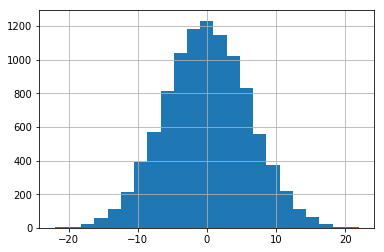

In [13]:
list_outcomes = [x[1].sum() for x in list_test]
pd.Series(list_outcomes).hist(bins=len(set(list_outcomes)))

A second interesting question about this game is the following: How many times in the 40 tosses will Peter be in the lead? Looking at the graph of his winnings (above), we see that Peter is in the lead when his winnings are positive, but we have to make some convention when his winnings are 0 if we want all tosses to contribute to the number of times in the lead. We adopt the convention that, when Peter’s winnings are 0, he is in the lead if he was ahead at the previous toss and not if he was behind at the previous toss. With this convention, Peter is in the lead 34 times in our example. Again, our intuition might suggest that the most likely number of times to be in the lead is 1/2 of 40, or 20, and the least likely numbers are the extreme cases of 40 or 0. 

It is easy to settle this by simulating the game a large number of times and keeping track of the number of times that Peter’s ﬁnal winnings are j, and the number of times that Peter ends up being in the lead by k. The proportions over all games then give estimates for the corresponding probabilities. The program `HTSimulation` carries out this simulation. Note that when there are an even number of tosses in the game, it is possible to be in the lead only an even number of times. We have simulated this game 10,000 times. 

These graphs, which we call spike graphs, were generated using the program `Spikegraph`. The vertical line, or spike, at position x on the horizontal axis, has a height equal to the proportion of outcomes which equal x. Our intuition about Peter’s ﬁnal winnings was quite correct, but our intuition about the number of times Peter was in the lead was completely wrong. The simulation suggests that the least likely number of times in the lead is 20 and the most likely is 0 or 40. This is indeed correct, and the explanation for it is suggested by playing the game of heads or tails with a large number of tosses and looking at a graph of Peter’s winnings.

In [14]:
def Spikegraph(values):
    plt.figure()
    values.plot()
    plt.hlines(y=0, xmin=0, xmax=len(values))

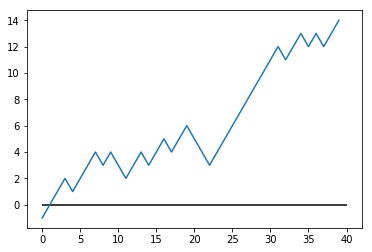

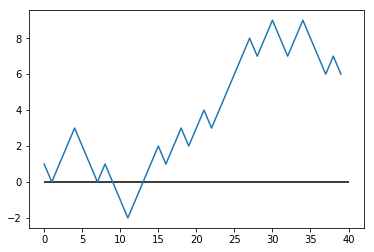

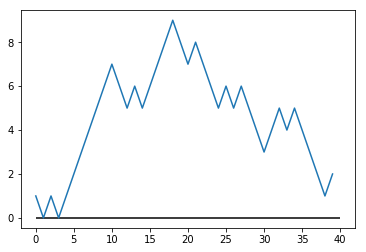

In [15]:
Spikegraph(list_test[0][2])
Spikegraph(list_test[1][2])
Spikegraph(list_test[2][2])

#### Example 1.5 (Horse Races) 

Four horses (Acorn, Balky, Chestnut, and Dolby) have raced many times. It is estimated that Acorn wins 30 percent of the time, Balky 40 percent of the time, Chestnut 20 percent of the time, and Dolby 10 percent of the time. 

We can have our computer carry out one race as follows: Choose a random number x. If x < .3 then we say that Acorn won. If .3 ≤ x < .7 then Balky wins. If .7 ≤x < .9 then Chestnut wins. Finally, if .9 ≤ x then Dolby wins. 

The program `HorseRace` uses this method to simulate the outcomes of n races. Running this program for n = 10 we found that Acorn won 40 percent of the time, Balky 20 percent of the time, Chestnut 10 percent of the time, and Dolby 30 percent of the time. A larger number of races would be necessary to have better agreement with the past experience. Therefore we ran the program to simulate 1000 races with our four horses. Although very tired after all these races, they performed in a manner quite consistent with our estimates of their abilities. Acorn won 29.8 percent of the time, Balky 39.4 percent, Chestnut 19.5 percent, and Dolby 11.3 percent of the time. 

In [24]:
def HorseRace(n):
    list_rand = RandomNumbers(n)
    s_rand = pd.Series(list_rand)
    s_horses = pd.cut(s_rand, [0, 0.3, 0.7, 0.9, 1.1], labels=['Acron', 'Balky', 'Chestnut', 'Dolby'])
    df_out = pd.concat([s_rand, s_horses], axis=1)
    return df_out

In [34]:
df_test = HorseRace(1000)
ICD.display(df_test[1].value_counts().sort_index() / df_test.shape[0])

df_test = HorseRace(10000)
ICD.display(df_test[1].value_counts().sort_index() / df_test.shape[0])

df_test = HorseRace(100000)
ICD.display(df_test[1].value_counts().sort_index() / df_test.shape[0])

Acron       0.286
Balky       0.408
Chestnut    0.210
Dolby       0.096
Name: 1, dtype: float64

Acron       0.3059
Balky       0.3906
Chestnut    0.2003
Dolby       0.1032
Name: 1, dtype: float64

Acron       0.30069
Balky       0.39866
Chestnut    0.19975
Dolby       0.10090
Name: 1, dtype: float64

The program `GeneralSimulation` uses this method to simulate repetitions of an arbitrary experiment with a ﬁnite number of outcomes occurring with known probabilities. 

In [52]:
def GeneralSimulation(n, list_odds, list_labels):
    list_rand = RandomNumbers(n)
    s_rand = pd.Series(list_rand)
    list_odds_use = [0] + [x for x in pd.Series(list_odds).cumsum().values]
    list_odds_use[len(list_odds_use) - 1] = 1.1
    s_outcomes = pd.cut(s_rand, list_odds_use, labels=list_labels)
    df_out = pd.concat([s_rand, s_outcomes], axis=1)
    return df_out

In [55]:
df_test = GeneralSimulation(1000, [0.3, 0.4, 0.2, 0.1], ['Acorn', 'Balky', 'Chestnut', 'Dolby'])
ICD.display(df_test[1].value_counts().sort_index() / df_test.shape[0])

df_test = GeneralSimulation(10000, [0.3, 0.4, 0.2, 0.1], ['Acorn', 'Balky', 'Chestnut', 'Dolby'])
ICD.display(df_test[1].value_counts().sort_index() / df_test.shape[0])

df_test = GeneralSimulation(100000, [0.3, 0.4, 0.2, 0.1], ['Acorn', 'Balky', 'Chestnut', 'Dolby'])
ICD.display(df_test[1].value_counts().sort_index() / df_test.shape[0])

Acorn       0.346
Balky       0.367
Chestnut    0.193
Dolby       0.094
Name: 1, dtype: float64

Acorn       0.3002
Balky       0.4005
Chestnut    0.1985
Dolby       0.1008
Name: 1, dtype: float64

Acorn       0.29779
Balky       0.40022
Chestnut    0.20113
Dolby       0.10086
Name: 1, dtype: float64

## Exercises

1. Modify the program `CoinTosses` to toss a coin n times and print out after every 100 tosses the proportion of heads minus 1/2. Do these numbers appear to approach 0 as n increases? Modify the program again to print out, every 100 times, both of the following quantities: the proportion of heads minus 1/2, and the number of heads minus half the number of tosses. Do these numbers appear to approach 0 as n increases?

The proportion appears to be slowly approaching 0 as n increases.

The second part looks much the same for the proportion and then the number of heads minus the number of tosses seems to fluctuate but remain relatively small. The number of simulations I have done may not be enough to see the count approach 0 however the relatively small number away from 0 might imply that the frequency is slowly moving towards the expected average of 0.5.

In [110]:
def CoinTosses(n):
    list_rand = RandomNumbers(n)
    s_rand = pd.Series(list_rand)
    s_out = s_rand.map(lambda x: 'T' if x < 0.5 else 'H')
    var_out = ''.join(s_out.values.tolist())
    for i in range(1, int(np.ceil(n / 100)) + 1):
        list_sub = list_test[0:(i * 100)]
        var_heads = len(re.sub('T', '', list_sub))
        var_i = (var_heads / len(list_sub)) - 0.5
        print(round(var_i, 8))
    return var_out
print('Test 1')
list_test = CoinTosses(10000)

def CoinTosses(n):
    list_rand = RandomNumbers(n)
    s_rand = pd.Series(list_rand)
    s_out = s_rand.map(lambda x: 'T' if x < 0.5 else 'H')
    var_out = ''.join(s_out.values.tolist())
    for i in range(1, int(np.ceil(n / 100)) + 1):
        list_sub = list_test[0:(i * 100)]
        var_heads = len(re.sub('T', '', list_sub))
        var_i = (var_heads / len(list_sub)) - 0.5
        var_j = var_heads - (len(list_sub) / 2)
        print(round(var_i, 8), ':', var_j)
    return var_out
print('\nTest 2')
list_test = CoinTosses(10000)

Test 1
0.04
0.005
-0.02
-0.0175
-0.042
-0.03833333
-0.03714286
-0.02625
-0.01333333
-0.007
-0.01
-0.01083333
-0.00923077
-0.00857143
-0.012
-0.01125
-0.00764706
-0.005
0.00052632
-0.0015
-0.00190476
-0.00272727
-0.0026087
0.00083333
-0.002
-0.00192308
-0.00037037
-0.00107143
-0.00068966
-0.002
0.0
-0.0003125
0.00151515
0.00117647
0.00057143
0.00166667
0.00135135
0.00052632
0.00205128
0.002
0.00317073
0.00428571
0.00418605
0.00386364
0.00466667
0.00304348
0.00170213
0.001875
0.00306122
0.0034
0.00392157
0.00480769
0.00396226
0.00574074
0.006
0.00607143
0.00561404
0.0062069
0.00474576
0.00383333
0.00311475
0.00435484
0.00285714
0.00171875
0.00123077
0.00106061
0.00089552
0.00117647
0.00130435
0.00114286
0.00197183
0.00083333
0.0
-0.00067568
-0.00053333
-0.00118421
-0.00168831
-0.00230769
-0.00303797
-0.002875
-0.00345679
-0.00329268
-0.00313253
-0.00357143
-0.00388235
-0.00383721
-0.0037931
-0.00409091
-0.00370787
-0.00433333
-0.0043956
-0.00467391
-0.00430108
-0.00478723
-0.00442105
-0.

---
**GigiSR**